#Team 8

#Krishna Veer Singh - 202211048
#Samaksh Gupta - 202211047
#Madhavi Aghera - 202211049
#Dhruvi Shah - 202211032

In [1]:
import numpy as np
import pandas as pd

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rajmehra03/movielens100k

  0% 0.00/1.69M [00:00<?, ?B/s]
100% 1.69M/1.69M [00:00<00:00, 162MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('movielens100k.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [12]:
print(movies.shape)
print(tags.shape)
print(ratings.shape)

(9125, 3)
(1296, 4)
(100004, 4)


In [13]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [15]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
movies.duplicated().sum()

0

In [17]:
ratings.duplicated().sum()

0

In [18]:
tags.duplicated().sum()

0

## Popularity Based Recommender System

In [19]:
ratings_with_name = ratings.merge(movies,on='movieId')

In [21]:
num_rating_df = ratings_with_name.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2
...,...,...
9059,xXx (2002),23
9060,xXx: State of the Union (2005),1
9061,¡Three Amigos! (1986),31
9062,À nous la liberté (Freedom for Us) (1931),1


In [37]:
avg_rating_df = ratings_with_name.groupby('title').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating_df

,title,avg_rating
0,"""Great Performances"" Cats (1998)",1.750000
1,$9.99 (2008),3.833333
2,'Hellboy': The Seeds of Creation (2004),2.000000
3,'Neath the Arizona Skies (1934),0.500000
4,'Round Midnight (1986),2.250000
...,...,...
9059,xXx (2002),2.478261
9060,xXx: State of the Union (2005),1.000000
9061,¡Three Amigos! (1986),3.258065
9062,À nous la liberté (Freedom for Us) (1931),4.500000


In [38]:
popular_df = num_rating_df.merge(avg_rating_df,on='title')
popular_df

,title,num_ratings,avg_rating
0,"""Great Performances"" Cats (1998)",2,1.750000
1,$9.99 (2008),3,3.833333
2,'Hellboy': The Seeds of Creation (2004),1,2.000000
3,'Neath the Arizona Skies (1934),1,0.500000
4,'Round Midnight (1986),2,2.250000
...,...,...,...
9059,xXx (2002),23,2.478261
9060,xXx: State of the Union (2005),1,1.000000
9061,¡Three Amigos! (1986),31,3.258065
9062,À nous la liberté (Freedom for Us) (1931),1,4.500000


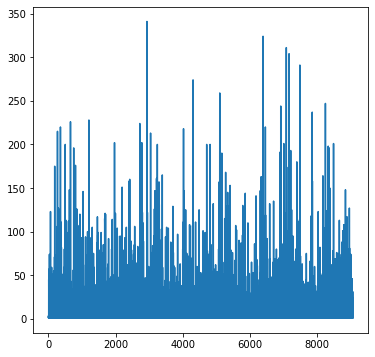

In [39]:
import matplotlib.pyplot as plt 
popular_df["num_ratings"].plot(x="u", y="num_ratings", figsize=(6, 6))
plt.show()

In [40]:
popular_df.describe()

,num_ratings,avg_rating
count,9064.000000,9064.000000
mean,11.033098,3.292065
std,24.053106,0.881997
min,1.000000,0.500000
25%,1.000000,2.843527
50%,3.000000,3.500000
75%,9.000000,3.965976
max,341.000000,5.000000


In [41]:
popular_df = popular_df[popular_df['num_ratings']>=150].sort_values('avg_rating',ascending=False)

In [42]:
popular_df.shape

(53, 3)

In [43]:
popular_df = popular_df.merge(movies,on='title').drop_duplicates('title')[['title','num_ratings','avg_rating']]

In [44]:
popular_df

,title,num_ratings,avg_rating
0,"Godfather, The (1972)",200,4.487500
1,"Shawshank Redemption, The (1994)",311,4.487138
2,"Usual Suspects, The (1995)",201,4.370647
3,Schindler's List (1993),244,4.303279
4,Fargo (1996),224,4.256696
5,Pulp Fiction (1994),324,4.256173
6,American Beauty (1999),220,4.236364
7,Star Wars: Episode V - The Empire Strikes Back...,234,4.232906
8,Star Wars: Episode IV - A New Hope (1977),291,4.221649
9,"Princess Bride, The (1987)",163,4.208589


In [45]:
popular_df['title'][0]

'Godfather, The (1972)'

## Collaborative Filtering Based Recommender System

In [49]:
x = ratings_with_name.groupby('userId').count()['rating'] > 200
velle_users = x[x].index

In [50]:
filtered_rating = ratings_with_name[ratings_with_name['userId'].isin(velle_users)]

In [51]:
y = filtered_rating.groupby('title').count()['rating']>=50
famous_movies = y[y].index

In [52]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_movies)]

In [53]:
pt = final_ratings.pivot_table(index='title',columns='userId',values='rating')

In [54]:
pt.fillna(0,inplace=True)

In [55]:
pt

userId,4,15,17,19,22,23,30,48,56,57,...,605,607,608,615,624,648,652,654,664,665
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.0,5.0,4.5,4.0,0.0,3.5,4.0,4.5,2.0,0.0,...,1.0,0.0,5.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0
Ace Ventura: Pet Detective (1994),0.0,2.0,0.0,3.0,0.0,2.0,2.0,3.5,0.0,0.0,...,5.0,2.5,0.0,3.0,3.0,3.0,0.0,4.5,0.0,3.0
Airplane! (1980),5.0,4.0,2.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,...,5.0,3.5,0.0,4.5,5.0,0.0,0.0,4.5,0.0,4.0
Aladdin (1992),5.0,0.5,0.0,3.0,2.0,4.0,5.0,0.0,0.0,0.0,...,4.0,4.0,0.0,0.0,0.0,2.0,4.0,4.5,0.0,4.0
Alien (1979),5.0,4.0,0.0,4.0,3.5,0.0,4.0,3.5,0.0,3.0,...,3.0,4.0,4.0,4.5,3.0,0.0,0.0,5.0,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Who Framed Roger Rabbit? (1988),5.0,4.0,0.0,0.0,4.0,3.5,5.0,3.5,0.0,0.0,...,0.0,3.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,3.0
Willy Wonka & the Chocolate Factory (1971),5.0,3.0,0.0,4.0,0.0,0.0,3.0,0.0,4.0,4.0,...,0.0,3.0,0.0,0.0,4.0,0.0,0.0,3.5,0.0,5.0
"Wizard of Oz, The (1939)",5.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
similarity_scores = cosine_similarity(pt)

In [58]:
similarity_scores.shape

(188, 188)

In [59]:
def recommend(movie_name):
    # index fetch
    index = np.where(pt.index==movie_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = movies[movies['title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        
        data.append(item)
    
    return data

In [68]:
recommend('Aladdin (1992)')

[['Beauty and the Beast (1991)'],
 ['Lion King, The (1994)'],
 ['Men in Black (a.k.a. MIB) (1997)'],
 ['Jurassic Park (1993)']]

In [63]:
pt.index[145]

'Shawshank Redemption, The (1994)'

In [64]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [65]:
movies.drop_duplicates('title')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [67]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(movies,open('movies.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))